# Import pakietów

In [ ]:
# zaimportuj pandas
# zaimportuj pakiety do wizualizacji danych np matplotlib, seaborn
# z pakietu sklearn zaimportuj funkcję do podziału danych na zbiór treningowy i testowy, 
# algorytm regrefji liniowej, algorytm drzewa decyzyjnego, metrykę r2 oraz MSE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Wstępne zapoznanie się ze zbiorem danych

In [ ]:
# wgraj zbiór danych kc_house_data.csv
kc_house=pd.read_csv('kc_house_data.csv')

In [ ]:
# wyświetl kilka pierwszych wierszy zbioru
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# wyświetl informacje o zbiorze danych
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Columns definition:
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
* condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
# wyświetl statystyki
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Przetwarzanie danych

In [ ]:
# Ten krok ma na celu lepsze zapoznanie się ze zbiorem danych, usunięcie błędów, braków danych itp.

<ipython-input-9-cc2c8b44fde0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house['price'])


<Axes: xlabel='price', ylabel='Density'>

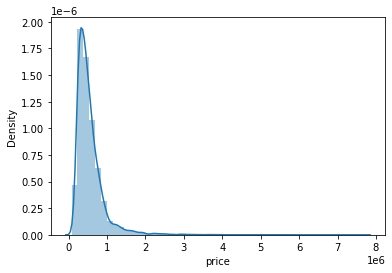

In [ ]:
# sprawdz rozkład zmiennej 'price' 
sns.distplot(kc_house['price'])

In [ ]:
# sprawdź, ile sypialni mają budynki
kc_house['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
set(kc_house['bedrooms'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}

In [ ]:
# usuń domy z odstającą liczbą sypialni

<ipython-input-17-5654c4a58f10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

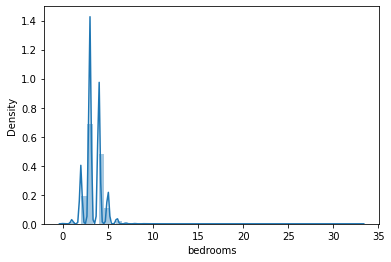

In [ ]:
sns.distplot(kc_house['bedrooms'])

In [ ]:
upper=kc_house['bedrooms'].mean()+kc_house['bedrooms'].std()*3
lower=kc_house['bedrooms'].mean()-kc_house['bedrooms'].std()*3

In [ ]:
kc_house2=kc_house[(kc_house['bedrooms']<upper) & (kc_house['bedrooms']>lower)]

<ipython-input-26-6a5b454067ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house2['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

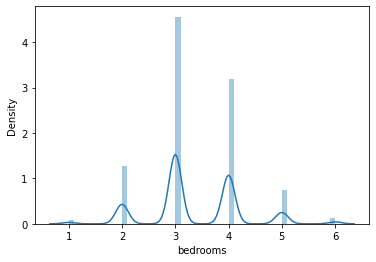

In [ ]:
sns.distplot(kc_house2['bedrooms'])

In [ ]:
# sprawdź liczbę łazienek w budynkach
set(kc_house['bathrooms'])

{0.0,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0}

In [ ]:
kc_house['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
# popraw zmienną 'bathrooms' jeżeli uważasz, że jest to potrzebne
kc_house2['bathrooms']= kc_house2['bathrooms'].apply(np.int64)

<ipython-input-25-30370b9b4e4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_house2['bathrooms']= kc_house2['bathrooms'].apply(np.int64)


In [ ]:
# sprawdź rozkład cen domów w zależności od ich kondycji

In [ ]:
kc_house.head(-5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [ ]:
# porównaj rok budowy domu z jego kondycją

In [ ]:
# sprawdź korelację między zmiennymi

In [ ]:
# po wstępnym zapoznaniu się ze zbiorem danych zdefiniuj zmienne potrzebne do stworzenia modelu, zdefiniuj zmienną zelażną(target) oraz zmienne niezależna

# Modele predykcyjne

In [ ]:
# zdefinuj zmienne X
X=kc_house2[['bedrooms',  'bathrooms',  'sqft_living',  'sqft_lot', 'floors', 'waterfront', 'view', 'condition',  'grade',  'sqft_above', 'sqft_basement',  'yr_built', 'yr_renovated', 'zipcode',  'lat',  'long', 'sqft_living15']]
y=kc_house2['price']


In [ ]:
# zdefiniuj zmienną y
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
# podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

## Regresja liniowa

In [ ]:
# wytrenuj model regresji liniowej na zbiorze treningowym



In [ ]:
model_lin=LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([130316.73627645,  16427.35804744])

In [ ]:
reg.intercept_

46239.98318375903

In [ ]:
# zrób predykcje na zbiorze testowym
y_lin_test=model_lin.predict(X_test)

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_dt_train=dt.predict(X_train)

In [ ]:
y_dt_test=dt.predict(X_test)

In [ ]:
y_test

21085     677790.0
15453     575000.0
18417     252000.0
524       275000.0
21506    2238890.0
           ...    
6118      325000.0
13863     365000.0
854       327000.0
2305      860000.0
16048     361810.0
Name: price, Length: 4308, dtype: float64

In [ ]:
# oblicz współczynnik r2
r2_score(y_test, y_lin_test)

0.71565147596991

In [ ]:
# oblicz metrykę MSE

In [ ]:
# wyświetl współczynniki dla zmiennych

In [ ]:
# wyświetl współczynnik dla wyrazu wolnego

### Drzewo decyzyjne

In [ ]:
# wytrenuj model regresji liniowej na zbiorze treningowym

In [ ]:
# zrób predykcje na zbiorze testowym

In [ ]:
# oblicz współczynnik r2

In [ ]:
# oblicz metrykę MSE

In [ ]:
# narysuj model drzewa

# Porównanie modeli

In [ ]:
# który model wyszedł lepszy?

In [ ]:
np.arange(2, 3).reshape(6)

ValueError: ignored

In [ ]:
np.random.randint(2, 6, (2,3))

array([[3, 4, 5],
       [5, 3, 4]])